<a href="https://colab.research.google.com/github/BugYale/Data-science-PMA/blob/main/PMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is an ensemble random forest classification algorithm
# All code related to the algorithm is referred to the official documentation
# Website url: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

In [1]:
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')

df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [4]:
index_to_drop = df[(df['Age(Years)'] < 17) & (df['Level of Education'].isin(['Under Graduate', 'Post Graduate']))].index

# According to University of Kent(2023), the minimum age to study a degree programme at the university is normally at least 17 years old on the date of registration.
# Delete undergraduate/graduate whose age < 17: Delete 1 row of data
df = df.drop(index_to_drop)
df.count()

Gender                                                           1032
Home Location                                                    1032
Level of Education                                               1032
Age(Years)                                                       1032
Number of Subjects                                               1032
Device type used to attend classes                               1032
Economic status                                                  1032
Family size                                                      1032
Internet facility in your locality                               1032
Are you involved in any sports?                                  1032
Do elderly people monitor you?                                   1032
Study time (Hours)                                               1032
Sleep time (Hours)                                               1032
Time spent on social media (Hours)                               1032
Interested in Gaming

In [5]:
sum_col = df['Study time (Hours)'] + df['Sleep time (Hours)'] + df['Time spent on social media (Hours)']
cond = sum_col > 24
print(df.index[cond])

# delete students whose Study time + Sleep time + Time spent on social media >24 hours：Delete 2 row of data
df = df.drop(df.index[cond])

df.count()

Int64Index([83, 84], dtype='int64')


Gender                                                           1030
Home Location                                                    1030
Level of Education                                               1030
Age(Years)                                                       1030
Number of Subjects                                               1030
Device type used to attend classes                               1030
Economic status                                                  1030
Family size                                                      1030
Internet facility in your locality                               1030
Are you involved in any sports?                                  1030
Do elderly people monitor you?                                   1030
Study time (Hours)                                               1030
Sleep time (Hours)                                               1030
Time spent on social media (Hours)                               1030
Interested in Gaming

In [6]:
# Change 'Nov-20' in this column to '11-20', consistent with the format of the other average marks ranges
df['Average marks scored before pandemic in traditional classroom'].replace('Nov-20', '11-20', inplace=True)

In [7]:
# Because a few rows of data were deleted, the index value needs to be updated
df = df.reset_index(drop=True)

In [8]:
# Essentially all ML requires data to be numerical but quite often some of data we get are text. 
# It is often desireable to apply some form of transformation to numerical values.

# Dealing with Categorical Data--binary

df["Gender"] = np.where(df["Gender"] == "Female", 1, 0)
df["Home Location"] = np.where(df["Home Location"] == "Rural", 1, 0)
df["Are you involved in any sports?"] = np.where(df["Are you involved in any sports?"] == "No", 1, 0)
df["Do elderly people monitor you?"] = np.where(df["Do elderly people monitor you?"] == "No", 1, 0)
df["Interested in Gaming?"] = np.where(df["Interested in Gaming?"] == "No", 1, 0)
df["Have separate room for studying?"] = np.where(df["Have separate room for studying?"] == "No", 1, 0)
df["Engaged in group studies?"] = np.where(df["Engaged in group studies?"] == "No", 1, 0)

In [9]:
# Dealing with Categorical Data--multiple

# translate marks interval into score of 1 (bad) to 10 (good)

df['Average marks scored before pandemic in traditional classroom'].replace({'0-10': 1, '11-20': 2, '21-30': 3, '31-40': 4, '41-50': 5, '51-60': 6, '61-70': 7, '71-80': 8, '81-90': 9, '91-100': 10}, inplace=True)

In [10]:
# Since 'Level of Education' and 'Economic status' also tend to go from low to high
# So they can also be converted directly into numbers like 1 (low) to 3 (high)

df['Level of Education'].replace({'School': 1, 'Under Graduate': 2, 'Post Graduate': 3}, inplace=True)
df['Economic status'].replace({'Poor': 1, 'Middle Class': 2, 'Rich': 3}, inplace=True)

In [11]:
# For other types of multi-class data, apply One-hot encoding
# generate binary values using get_dummies

df = pd.get_dummies(df, columns=["Device type used to attend classes"], prefix=["deviceType_"])
df = pd.get_dummies(df, columns=["Interested in?"], prefix=["educationalPattern_"])
df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,...,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,Your level of satisfaction in Online Education,deviceType__Desktop,deviceType__Laptop,deviceType__Mobile,educationalPattern__Both,educationalPattern__Practical,educationalPattern__Theory
0,0,0,2,18,11,2,4,5,1,0,...,1,1,6,Average,0,1,0,0,1,0
1,0,0,2,19,7,2,4,1,0,0,...,1,1,3,Bad,0,1,0,0,0,1
2,0,1,2,18,5,2,5,2,1,0,...,1,1,6,Bad,0,1,0,1,0,0
3,0,0,2,18,5,2,4,4,0,0,...,1,2,4,Bad,0,1,0,0,0,1
4,0,1,2,18,5,2,4,3,1,1,...,3,3,6,Average,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,2,6,5,0,0,...,4,4,8,Average,0,0,1,0,0,1
1026,1,1,2,20,6,2,3,1,1,1,...,5,5,10,Average,1,0,0,0,0,1
1027,1,1,2,20,3,2,3,2,1,1,...,2,2,6,Average,0,0,1,0,0,1
1028,1,1,2,19,6,2,2,3,0,1,...,3,3,6,Good,0,0,1,1,0,0


In [12]:
# Separate Y value('Your level of satisfaction in Online Education')

Y_df = df.loc[:, 'Your level of satisfaction in Online Education']

In [13]:
# Separate X values

X_df = df.drop('Your level of satisfaction in Online Education', axis=1, inplace=False)

In [ ]:
# Some ML algorithms need to satisfy the normal distribution hypothesis, such as linear regression, Gaussian process regression, etc. 
# Therefore, before selecting a suitable ML algorithm, it is necessary to check whether the column distribution in the data set is normal

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 

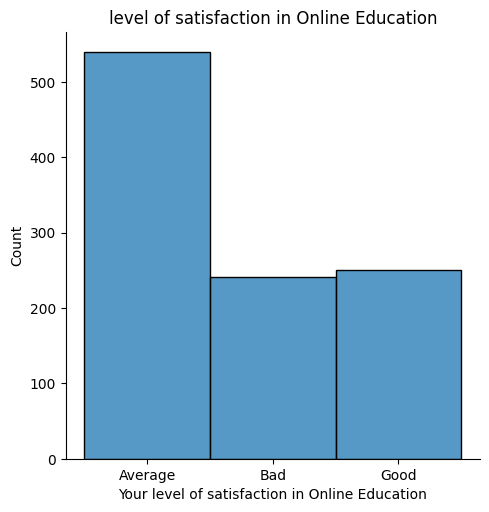

In [17]:
# Visual methods examine the distribution of Y value

ax = sns.displot(Y_df).set(title='level of satisfaction in Online Education')

In [18]:
# Use the Kolmogorov-Smirnov test to check the distribution of X values
from scipy.stats import kstest

for col in X_df.columns: # iteratre over each column
     # compare the column distribution to a normal distribution
    statistic, pval = kstest(X_df[col], "norm")
    print(f"column = {col}") 
    print(f"p value = {pval}")
    if pval < 0.05:
        print("Probably not normal")
    else:
        print("Probaly normal")
    print("\n")

column = Gender
p value = 1.2357510751860894e-238
Probably not normal


column = Home Location
p value = 1.2357510751860894e-238
Probably not normal


column = Level of Education
p value = 0.0
Probably not normal


column = Age(Years)
p value = 0.0
Probably not normal


column = Number of Subjects
p value = 0.0
Probably not normal


column = Economic status
p value = 0.0
Probably not normal


column = Family size
p value = 0.0
Probably not normal


column = Internet facility in your locality
p value = 0.0
Probably not normal


column = Are you involved in any sports?
p value = 1.2357510751860894e-238
Probably not normal


column = Do elderly people monitor you?
p value = 1.2357510751860894e-238
Probably not normal


column = Study time (Hours)
p value = 0.0
Probably not normal


column = Sleep time (Hours)
p value = 0.0
Probably not normal


column = Time spent on social media (Hours)
p value = 0.0
Probably not normal


column = Interested in Gaming?
p value = 1.2357510751860894e-238
P

In [19]:
# The output above shows that all values don't obey normal distribution

In [ ]:
''' 
Random Rorest doesn't need feature scaling because it is based on Decision Tree.
Decision Tree determines sample classification by comparing the size relationship between feature values and threshold values, 
rather than calculating the distance between features. So feature scaling does not affect its performance.

from sklearn.preprocessing import MinMaxScalerScaler
scaler = MinMaxScalerScaler()
X_df = scaler.fit_transform(X_df)
'''

<Axes: >

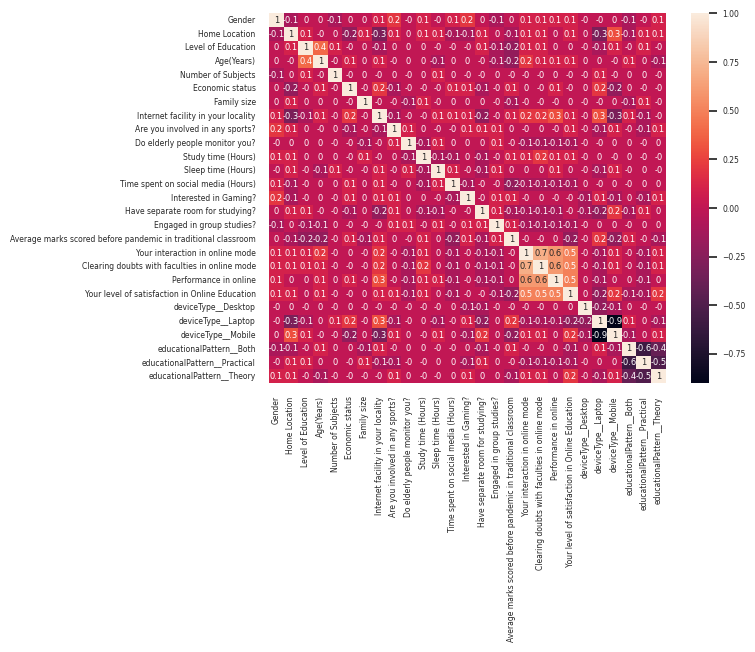

In [21]:
# calculate the correlation between X values and Y value

df['Your level of satisfaction in Online Education'].replace({'Bad': 1, 'Average': 2, 'Good': 3}, inplace=True) # Convert Y value into numeric type

# create a correlation matrix rounding to one decimal point
correlation_matrix = df.corr().round(1)

# print a correlation heat map
sns.set(font_scale=0.5) # Set the appropriate font size for display
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
'''
We measure this on a scale between -1 and 1: where -1 means perfective negative correlation, 1 means perfect positive correlation, 
0 means no correlation at all.
'deviceType_Laptop' and 'deviceType_Mobile' have a high correlation at 0.9. 
And due to they are all correlated with Y value('Your level of satisfaction in Online Education') at 0.2/-0.2, so just randomly remove one
'''

In [22]:
X_df = X_df.drop('deviceType__Laptop', axis=1, inplace=False)
X_df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,...,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,deviceType__Desktop,deviceType__Mobile,educationalPattern__Both,educationalPattern__Practical,educationalPattern__Theory
0,0,0,2,18,11,2,4,5,1,0,...,1,10,1,1,6,0,0,0,1,0
1,0,0,2,19,7,2,4,1,0,0,...,1,10,1,1,3,0,0,0,0,1
2,0,1,2,18,5,2,5,2,1,0,...,1,8,1,1,6,0,0,1,0,0
3,0,0,2,18,5,2,4,4,0,0,...,0,10,1,2,4,0,0,0,0,1
4,0,1,2,18,5,2,4,3,1,1,...,0,9,3,3,6,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,2,6,5,0,0,...,0,10,4,4,8,0,1,0,0,1
1026,1,1,2,20,6,2,3,1,1,1,...,1,8,5,5,10,1,0,0,0,1
1027,1,1,2,20,3,2,3,2,1,1,...,0,8,2,2,6,0,1,0,0,1
1028,1,1,2,19,6,2,2,3,0,1,...,1,7,3,3,6,0,1,1,0,0


In [23]:
# apply Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
Y_df.replace({'Bad': 0, 'Average': 1, 'Good': 2}, inplace=True) # convert Y value into numeric type

In [25]:
# split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=0)

# Define the random forest classifier model

''' 
Four hyperparameters are set here: the number of decision trees (n_estimators),the maximum number of features per tree(max_features), 
the maximum depth of the tree (max_depth), and the random number seed (random_state).

random_state is used to set the seed for the random number generator, 
which controls the randomness of the decision tree algorithm and can help to produce more consistent results.
random_state is usually equal to 0/1/42.
'''
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, max_features=7)


In [26]:
# Training model
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=7, random_state=0)

In [27]:
# Test
Y_pred = rfc.predict(X_test)

# Calculate performance indicators
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

# Print model performance indicators
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.72
Precision: 0.74
Recall: 0.72
F1-score: 0.71


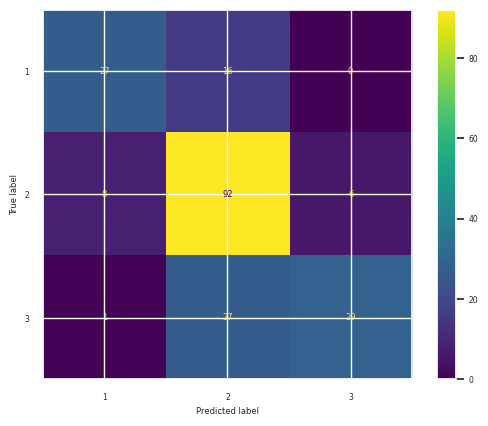

In [28]:
# build a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# see 
cm = confusion_matrix(Y_test, Y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

disp.plot()
plt.show()

In [29]:
# As can be seen from the figure above, this model is most accurate when previewing data of category 2——'Average'

The optimal parameter and the highest score: [100.           0.72084012]


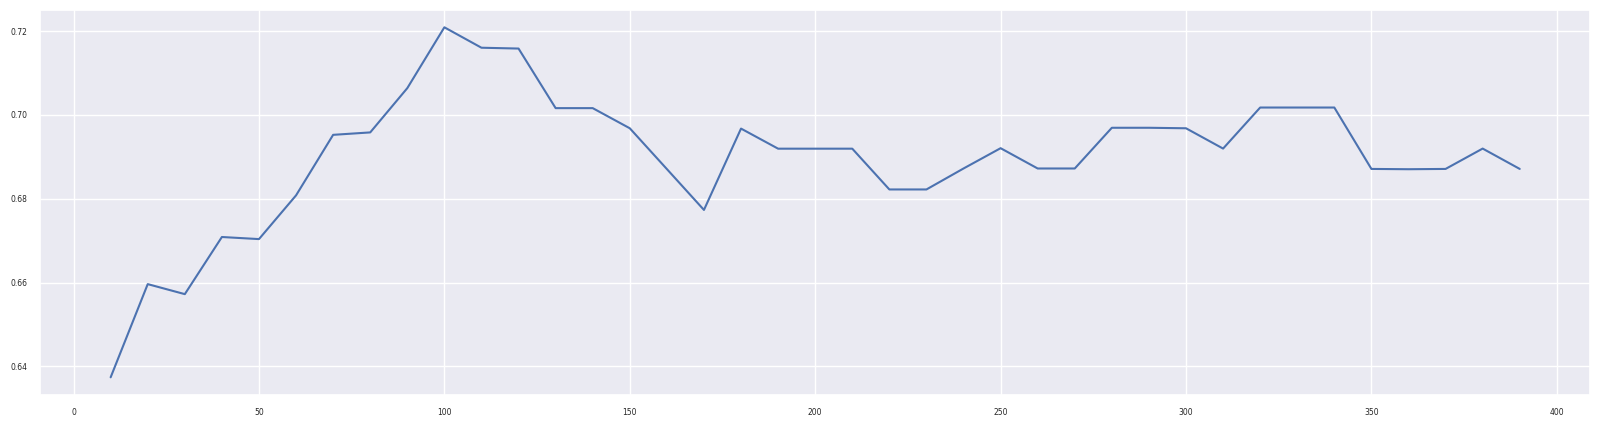

In [30]:
# hyperparameter optimisation——take 'n_estimators' for example

ScoreAll = []
for i in range(10,400,10):
    rfc = RandomForestClassifier(n_estimators=i, max_depth=10, random_state=0, max_features=7)
    rfc.fit(X_train, Y_train)
    Y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    score = (accuracy+precision+recall+f1)/4
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] # Find the index corresponding to the highest score
print("The optimal parameter and the highest score:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [ ]:
# As can be seen from the figure above, the optimal n_estimators hyperparameter value is 100

'''
The other hyperparameters can also be optimised by the same control variable method, 
and the optimal parameters as follows:
n_estimators=100, max_depth=10, random_state=0, max_features=7

Of course, this tuning method assumes that each hyperparameter is independent from each other, 
without considering the relationship between them, which has certain risks.

'''